###  내가 파이썬을 배우는 방법 (교재)
 - 숫자 야구 게임 만들기 실습 위주

#### 숫자 야구 게임이란?
기본적으로 1부터 9까지 서로 다른 수로 이루어진 3자리의 수를 맞추는 게임이다.  
  
같은 수가 같은 자리에 있으면 스트라이크, 다른 자리에 있으면 볼, 같은 수가 전혀 없으면 포볼 또는 낫싱이란 힌트를 얻고, 그 힌트를 이용해서 먼저 상대방의 수를 맞추면 승리한다.  
  
[예] 상대방의 수가 425일 때, 123을 제시한 경우 : 1 스트라이크 456을 제시한 경우 : 1 스트라이크 1볼 789를 제시한 경우 : 낫싱  

####  어떻게 만들까?
그럼 숫자야구 게임을 컴퓨터로 어떻게 구현할 지 생각해 보자. 만들면서 변경될 여지가 많겠지만, 그래도 가능한 구체적이고 자세하게 설계해야 개발 순서도 잡힐거고 산으로 가지 않겠지.

일단은 텍스트 모드로 기본 기능을 구현한 후에 GUI로 개발
컴퓨터를 상대로 하는 1인 게임 컴퓨터로 서로 다른 수로 이루어진 3자리 수를 무작위로 만들게 해야 함.
입력된 숫자가 적절한지 확인하는 기능이 필요 숫자가 맞는지, 3자리 수가 맞는지, 각 자리가 서로 다른 숫자가 맞는지
점수 계산 시작 점수를 주고 매 시도마다 일정 점수를 깍는다. 스트라이크 수와 볼 수에 따라 점수를 가산한다. (예: 스트라이크 50점, 볼 30점, 낫싱 100점) 숫자를 맞추면 보너스 점수 추가
볼카운트 결과와 현재 점수 출력
게임 종료 볼 카운트가 3스트라이크이면 승리 메시지 출력 종료 만약 점수가 0보다 적거나 시도 횟수가 미리 설정된 최대 횟수를 넘어가면 게임 패배 메시지 출력 종료
이 정도면 얼추 된 것 같다. 단순한 게임이니 굳이 필요하진 않지만, 그래도 기록물이니 간단하게 순서도를 그려보는게 좋겠다.

그림1. 숫자야구게임 순서도
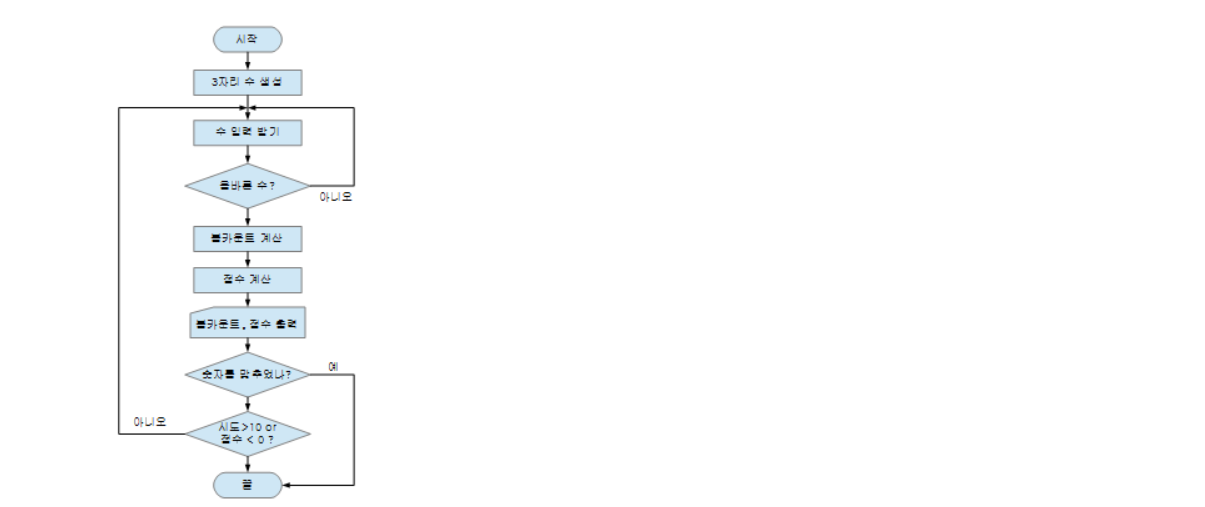

### 숫자야구게임 1차 버전 - 절차중심
아직 파이썬의 코딩 스타일에 익숙하지 않으므로, 우선 기본적인 스타일만 따르고 논리에만 집중하여 프로그램을 구현한다. 그리고나서 구현된 코드를 파이썬의 코딩 스타일에 맞게 하나 하나 다듬는게 쉽겠다.

아래는 그렇게 구현한 숫자야구게임 1차 버전이다.

In [78]:
print(f"""{'-'*40} 숫자야구 게임 {'-'*40}
기본적으로 1부터 9까지 서로 다른 수로 이루어진 3자리의 수를 맞추는 게임이다.
같은 수가 같은 자리에 있으면 스트라이크, 다른 자리에 있으면 볼, 같은 수가 전혀 없으면 포볼 또는 낫싱이란 힌트를 얻고, 그 힌트를 이용해서 먼저 상대방의 수를 맞추면 승리한다.

[예]상대방의 수가 425일 때, 123을 제시한 경우 : 1 스트라이크 / 456을 제시한 경우 : 1 스트라이크 1볼 / 789를 제시한 경우 : 낫싱""")

import random as rd
pc_num = ''
while len(pc_num) < 3:
    rd_num = str(rd.randint(0,9))
    if rd_num not in pc_num:
        pc_num += rd_num
print(pc_num)

while True:
    input_ch = int(input('[1]게임시작 [2]게임종료'))
    if input_ch == 1:
        rep_cnt = 0
        # ------------------stike, ball, nothing 판별--------------------- 
        while True:
            input_num = input('3자리 숫자를 입력하세요>> ')
            if len(input_num) != 3:
                print('조건에 맞지 않는 입력입니다. 3자리 숫자를 입력해주세요.')
                continue
            elif not input_num.isdigit(): 
                print('조건에 맞지 않는 입력입니다. 숫자만 입력해주세요.')
                continue
            elif (input_num[0] == input_num[1]) or (input_num[0] == input_num[2]) or (input_num[1] == input_num[2]):
                print('서로 다른 숫자로 3자리 숫자를 입력해주세요.')
                continue
            rep_cnt += 1 # 게임 횟수 카운팅
            
            # ------------------stike, ball, nothing 판별--------------------- 
            strike_cnt, ball_cnt = 0,0
            for i in range(len(pc_num)):
                if pc_num[i] == input_num[i]:
                    strike_cnt +=1
                
                elif input_num[i] in pc_num:
                    ball_cnt +=1
            
            if strike_cnt == 3:
                print(f'3strikd!! 축하합니다. {rep_cnt}번 만에 숫자 3개의 값과 위치를 모두 맞추셨습니다.')
                break
            elif strike_cnt + ball_cnt == 0:
                print('nothingㅠㅠ..!')
            else:
                print(f'{strike_cnt} strike, {ball_cnt} ball')
        
    elif input_ch == 2:
        print('게임이 종료 되었습니다.')
        break

---------------------------------------- 숫자야구 게임 ----------------------------------------
기본적으로 1부터 9까지 서로 다른 수로 이루어진 3자리의 수를 맞추는 게임이다.
같은 수가 같은 자리에 있으면 스트라이크, 다른 자리에 있으면 볼, 같은 수가 전혀 없으면 포볼 또는 낫싱이란 힌트를 얻고, 그 힌트를 이용해서 먼저 상대방의 수를 맞추면 승리한다.

[예]상대방의 수가 425일 때, 123을 제시한 경우 : 1 스트라이크 / 456을 제시한 경우 : 1 스트라이크 1볼 / 789를 제시한 경우 : 낫싱
821
[1]게임시작 [2]게임종료1
3자리 숫자를 입력하세요>> 246
0 strike, 1 ball
3자리 숫자를 입력하세요>> 201
1 strike, 1 ball
3자리 숫자를 입력하세요>> 421
2 strike, 0 ball
3자리 숫자를 입력하세요>> 521
2 strike, 0 ball
3자리 숫자를 입력하세요>> 621
2 strike, 0 ball
3자리 숫자를 입력하세요>> 721
2 strike, 0 ball
3자리 숫자를 입력하세요>> 821
축하합니다. 7번 만에 숫자 3개의 값과 위치를 모두 맞추셨습니다.


KeyboardInterrupt: Interrupted by user

In [86]:
import random
items = random.sample(range(1,10), 3)
rd_num = ''
hidden = [str(x) for x in items]

SyntaxError: invalid syntax (1014374206.py, line 4)

In [20]:
'123'.isdigit()

True

In [74]:
import random as rd
pc_num = ''
while len(pc_num) < 3:
    rd_num = str(rd.randint(0,9))
    if rd_num not in pc_num:
        pc_num += rd_num
print(pc_num)

693


In [34]:
print(rd_num)
'' in rd_num

799


False